In [ ]:
!pip3 install imgaug

# Import packages

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,Cropping2D,MaxPooling2D,Dropout,Flatten,Lambda,AveragePooling2D,Activation
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import pandas as pd
import random
import ntpath

# Read data

In [ ]:
datadir = 'track'
fetures = ['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=column)

## 

In [ ]:
def Only_Name(path):
  head,tail=ntpath.split(path)
  return tail

In [ ]:
data['center'] = data['center'].apply(Only_Name)
data['left'] = data['left'].apply(Only_Name)
data['right'] = data['right'].apply(Only_Name)
data.head()

center  ...     speed
0  center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

In [ ]:
num_bins = 25
hist,bins = np.histogram(data['steering'],num_bins)
type(hist)

numpy.ndarray

In [ ]:
print(hist)
print(bins)
center = (bins[:-1]+bins[1:])*0.5
print(center)

[  35    6    6    6   13    8   24   22   53  131   99  158 2990  137
   86  126   54   22   19    2    9    4    4    6   33]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


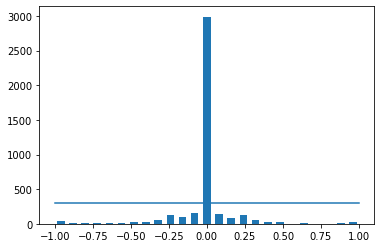

In [ ]:
samples_per_bin = 300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

total data: 4053
removed: 2690
remaining: 1363
[ 35   6   6   6  13   8  24  22  53 131  99 158 300 137  86 126  54  22
  19   2   9   4   4   6  33]


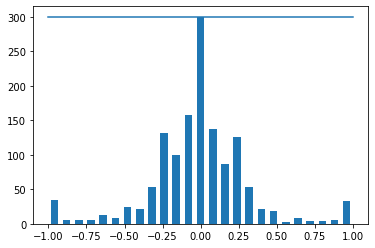

In [ ]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
print(hist)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

center      center_2018_07_16_17_11_44_413.jpg
left          left_2018_07_16_17_11_44_413.jpg
right        right_2018_07_16_17_11_44_413.jpg
steering                                 -0.05
throttle                              0.642727
reverse                                      0
speed                                  1.43401
Name: 12, dtype: object


In [ ]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1090
Valid Samples: 273


Text(0.5, 1.0, 'Validation set')

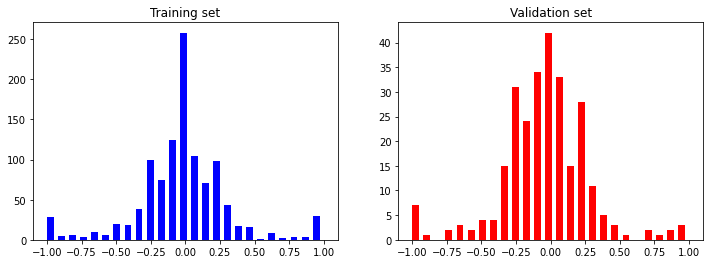

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

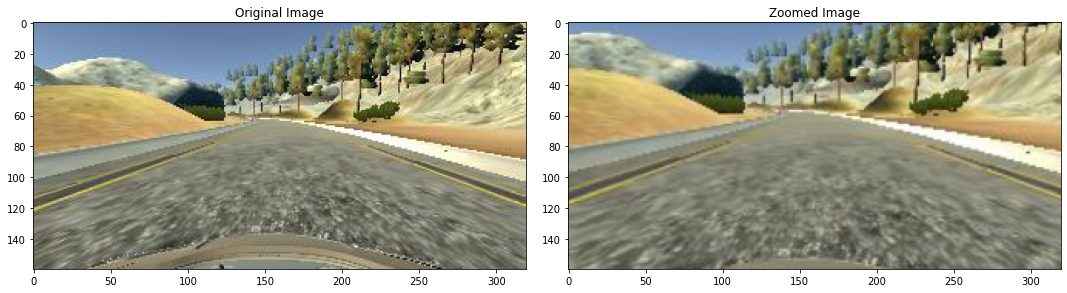

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

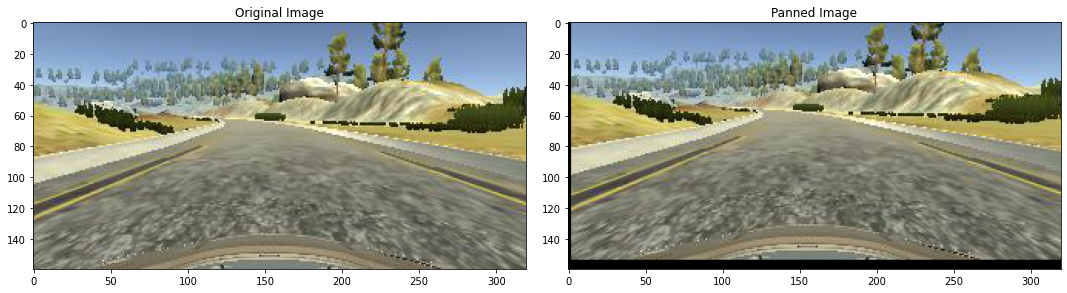

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

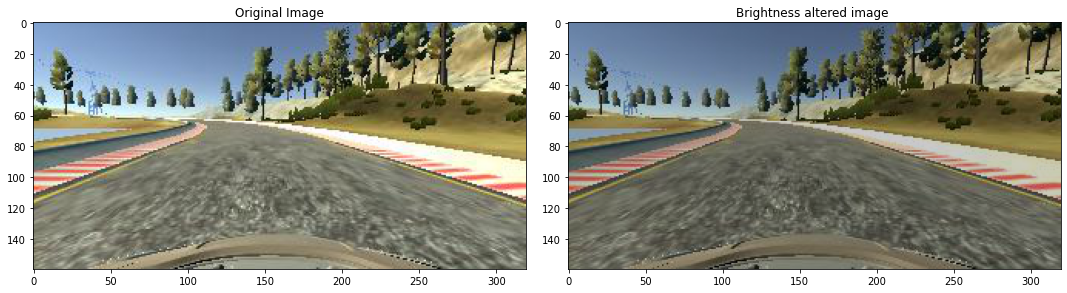

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.21083200000000002')

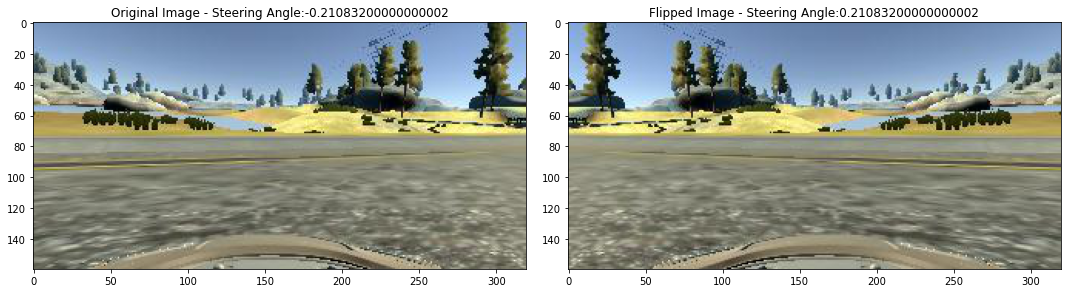

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [ ]:
np.random.rand()

0.8158666880360109

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

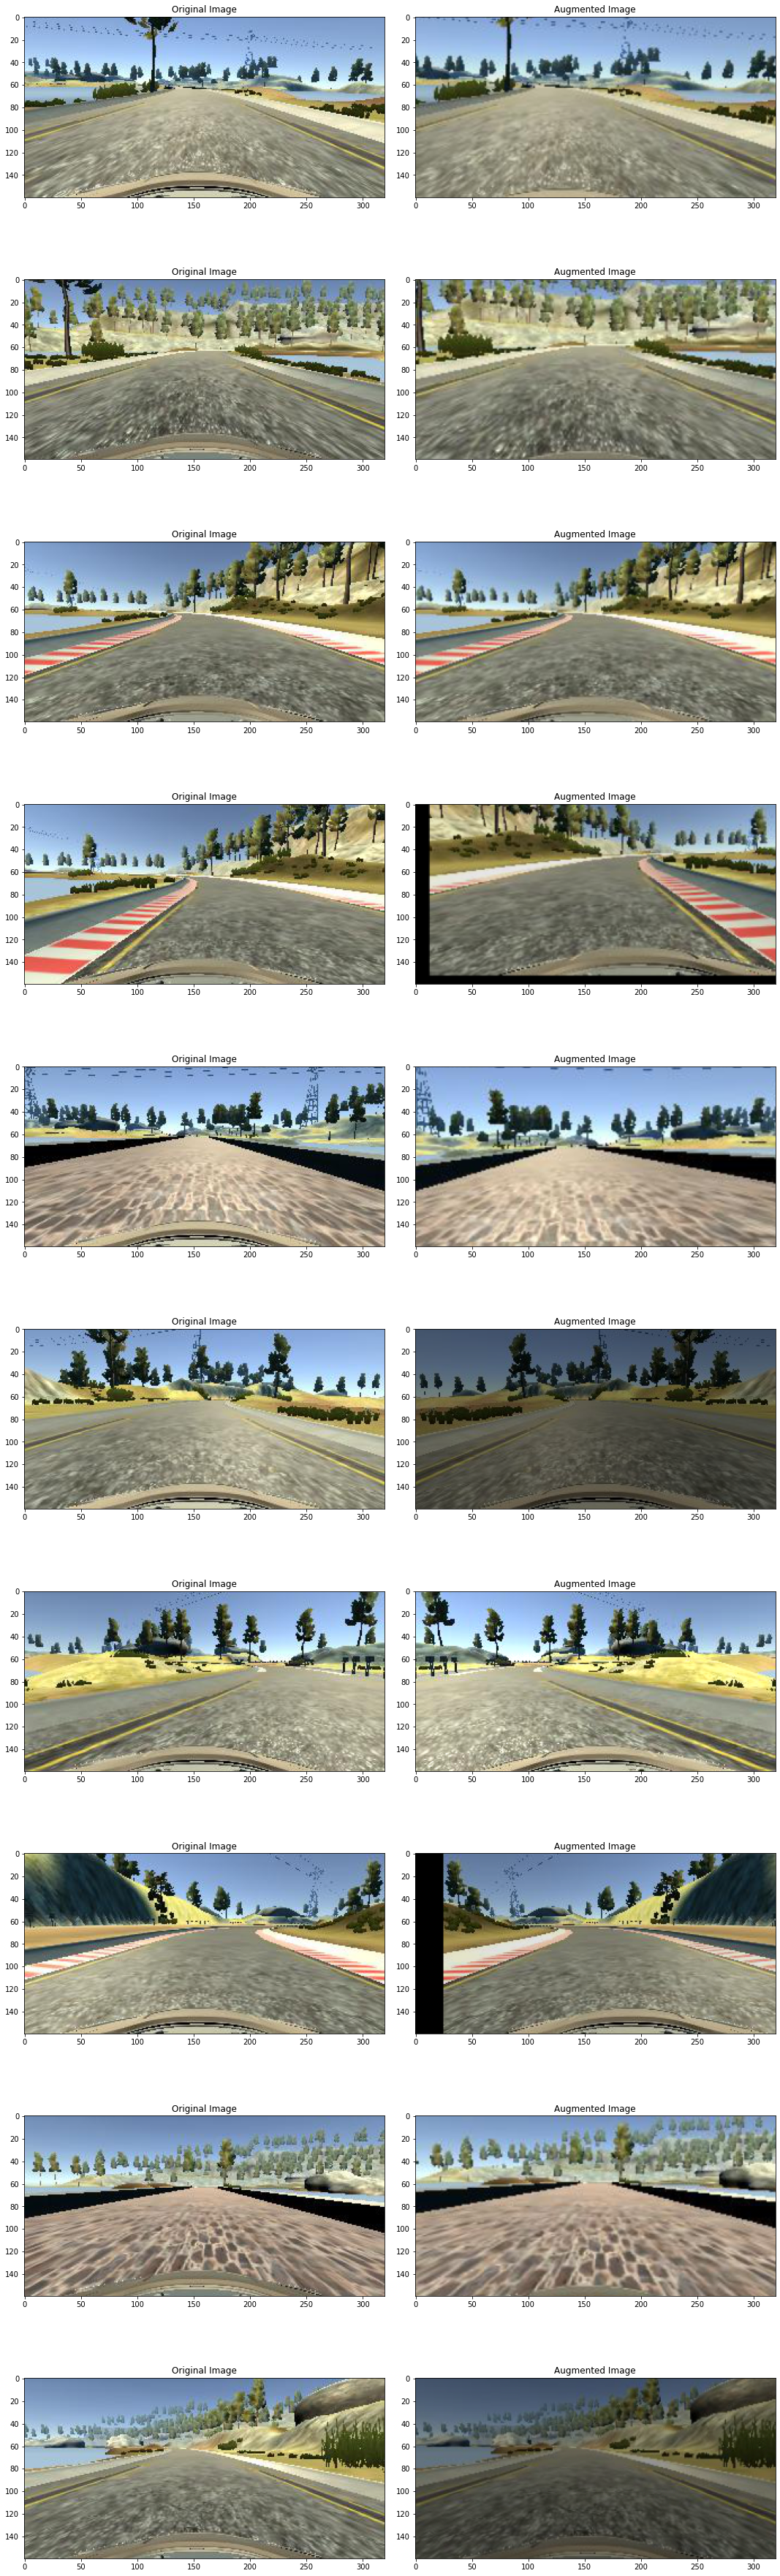

In [ ]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

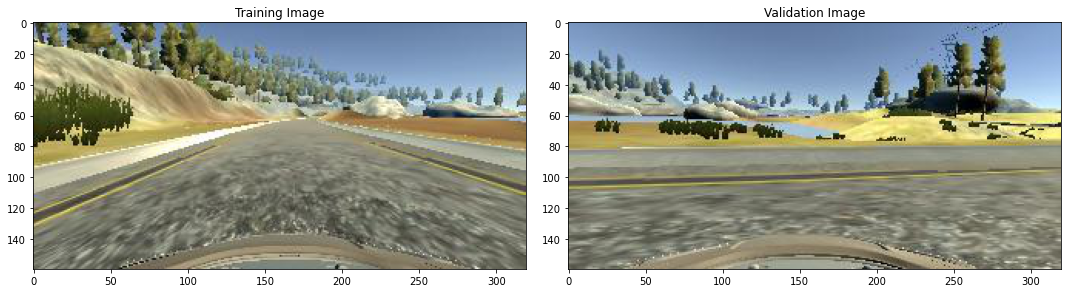

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [73]:
def nvidia_model():
  model = Sequential()
  
  model.add(Cropping2D(cropping=((40,25), (0,0)), input_shape=(160,320,3)))
  model.add(Lambda(lambda x: tf.image.resize(x, (66,200))))
  model.add(Lambda(lambda x: x/255.0 -0.5)) # normalization

  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(64, 3, 3, activation='relu'))

  model.add(Convolution2D(64, 3, 3, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(100, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(50, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1))

  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [74]:
model = nvidia_model()
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_12 (Cropping2D)   (None, 95, 320, 3)        0         
_________________________________________________________________
lambda_21 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
lambda_22 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 3, 20, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

In [75]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  epochs=15,
                                  steps_per_epoch=100,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/15
100/100 [==============================] - 91s 908ms/step - loss: 0.1043 - val_loss: 0.0581
Epoch 2/15
100/100 [==============================] - 85s 848ms/step - loss: 0.0806 - val_loss: 0.0620
Epoch 3/15
100/100 [==============================] - 86s 856ms/step - loss: 0.0684 - val_loss: 0.0471
Epoch 4/15
100/100 [==============================] - 85s 849ms/step - loss: 0.0642 - val_loss: 0.0492
Epoch 5/15
100/100 [==============================] - 85s 855ms/step - loss: 0.0624 - val_loss: 0.0470
Epoch 6/15
100/100 [==============================] - 84s 844ms/step - loss: 0.0562 - val_loss: 0.0481
Epoch 7/15
100/100 [==============================] - 85s 848ms/step - loss: 0.0534 - val_loss: 0.0447
Epoch 8/15
100/100 [==============================] - 84s 841ms/step - loss: 0.0515 - val_loss: 0.0425
Epoch 9/15
100/100 [==============================] - 84s 843ms/step - loss: 0.0505 - val_loss: 0.0458
Epoch 10/15
100/100 [==============================] - 84s 841ms/step - l

Text(0.5, 0, 'Epoch')

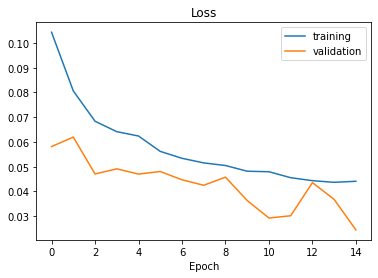

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [77]:
model.save('model3.h5')

In [78]:
def inceptionv2_moded_nvidia_model():
  model = Sequential()
  
  model.add(Cropping2D(cropping=((40,25), (0,0)), input_shape=(160,320,3)))
  model.add(Lambda(lambda x: tf.image.resize(x, (66,200)))) # Resize match the Nvidia input layer
  model.add(Lambda(lambda x: x/255.0 -0.5)) # normalization

  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
  # Fatorization 5x5 -> two 3x3 -> 3x1 + 1x3 and 3x3
  model.add(Convolution2D(36, 3, 1))
  model.add(Convolution2D(36, 1, 3))
  model.add(Convolution2D(36, 3, 3, subsample=(2, 2)))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  # Fatorization 5x5 -> two 3x3 -> 3x1 + 1x3 and 3x3
  model.add(Convolution2D(48, 3, 1))
  model.add(Convolution2D(48, 1, 3))
  model.add(Convolution2D(48, 3, 3, subsample=(2, 2)))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  # Fatorization 3x3 -> 3x1 + 1x3
  model.add(Convolution2D(48, 3, 1))
  model.add(Convolution2D(64, 1, 3))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  # Fatorization 3x3 -> 3x1 + 1x3
  model.add(Convolution2D(48, 3, 1))
  model.add(Convolution2D(64, 1, 3))
  model.add(Activation("relu"))
  model.add(Dropout(0.2))

  # Average pooling
  model.add(AveragePooling2D(pool_size=(1,6)))

  # Fully Connected
  model.add(Flatten())
  model.add(Dense(100, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(50, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1))

  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [79]:
model_inc = inceptionv2_moded_nvidia_model()
print(model_inc.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 1))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (1, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 3), strides=(2, 2))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_13 (Cropping2D)   (None, 95, 320, 3)        0         
_________________________________________________________________
lambda_23 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
lambda_24 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 29, 98, 36)        2628      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 29, 96, 36)        3924      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 47, 36)      

In [80]:
history_inc = model_inc.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=100, 
                                  epochs=15,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/15
100/100 [==============================] - 95s 950ms/step - loss: 0.1070 - val_loss: 0.0787
Epoch 2/15
100/100 [==============================] - 87s 870ms/step - loss: 0.0805 - val_loss: 0.0542
Epoch 3/15
100/100 [==============================] - 88s 875ms/step - loss: 0.0753 - val_loss: 0.0484
Epoch 4/15
100/100 [==============================] - 86s 864ms/step - loss: 0.0676 - val_loss: 0.0707
Epoch 5/15
100/100 [==============================] - 87s 872ms/step - loss: 0.0671 - val_loss: 0.0484
Epoch 6/15
100/100 [==============================] - 86s 859ms/step - loss: 0.0632 - val_loss: 0.0635
Epoch 7/15
100/100 [==============================] - 85s 854ms/step - loss: 0.0597 - val_loss: 0.0372
Epoch 8/15
100/100 [==============================] - 86s 859ms/step - loss: 0.0599 - val_loss: 0.0449
Epoch 9/15
100/100 [==============================] - 86s 857ms/step - loss: 0.0578 - val_loss: 0.0437
Epoch 10/15
100/100 [==============================] - 86s 860ms/step - l

Text(0.5, 0, 'Epoch')

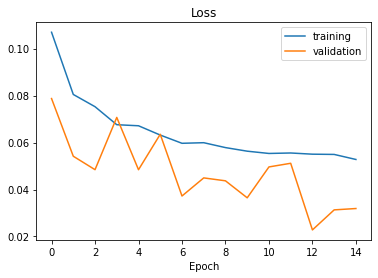

In [84]:
plt.plot(history_inc.history['loss'])
plt.plot(history_inc.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [82]:
model_inc.save('model3_icep.h5')

Text(0.5, 0, 'Epoch')

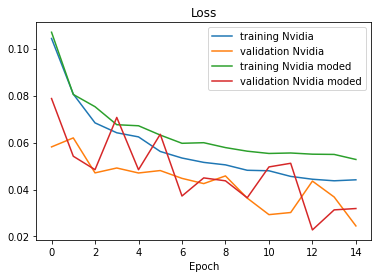

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_inc.history['loss'])
plt.plot(history_inc.history['val_loss'])
plt.legend(['training Nvidia', 'validation Nvidia', 'training Nvidia moded', 'validation Nvidia moded'])
plt.title('Loss')
plt.xlabel('Epoch')